In [1]:
from environment import truly_dynamic_environment, replay, visualize
from agent_pmcs_owen_fast import FastPMCSAgent

import numpy as np

# example as function
def random_agent2(board, player): 
    """Another random agent."""
    return np.random.choice(np.where(board[0]==0)[0])

pmcs_agent = FastPMCSAgent(inc=1000)
pmcs_agent2 = FastPMCSAgent(inc=1000, check_opponent_win=True)
players = [
    {
        "algo": pmcs_agent.act,
        "name": "pmcs_agent",
        "player": 1,
        "args": {}
    },
    {
        "algo": pmcs_agent2.act,
        "name": "pmcs_agent2",
        "player": -1,
        "args": {}
    }
]

Run the game

In [2]:
from collections import defaultdict
import json
import pickle

runs = []
win_cnt = defaultdict(int)
rounds = []
for _ in range(40):
    result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)
    
    # store results of each runs
    runs.append((result,final_board,all_boards))
    
    round = {}
    if result['winner'] == 1:
        win_cnt[players[0]['name']] += 1
        round = {'winner': players[0]['name']}
    elif result['winner'] == -1:
        win_cnt[players[1]['name']] += 1
        round = {'winner': players[1]['name']}
    else:
        win_cnt['draw'] += 1
    
    # record the time used
    round.update({players[0]['name']: sum(result['algo_info'][players[0]['name']]['time'])/1000, 
                      players[1]['name']: sum(result['algo_info'][players[1]['name']]['time'])/1000})
    rounds.append(round)
    # store the win counter and used times to file
    with open('win_cnt.json', 'w') as jfile:
        json.dump({'win_cnt': win_cnt, 'rounds': rounds}, jfile, indent=4)
        
    # switch players and make sure the first player uses 1 and the second uses -1 (according to the README)
    players[0], players[1] = players[1], players[0]
    players[0]['player'] *= -1
    players[1]['player'] *= -1

# dump runs into file
with open('runs.pkl', 'wb') as f:
    pickle.dump(runs, f)

win_cnt

pmcs_agent2 took a total of 20.536 seconds
pmcs_agent took a total of 21.82 seconds
The winner is pmcs_agent2 (1)
Turns Taken: 39


defaultdict(int, {'pmcs_agent2': 21, 'pmcs_agent': 19})

{'algo_info': {'random_agent2': {'time': [0.0467000063508749,
    0.03609998384490609,
    0.03360002301633358,
    0.03940000897273421,
    0.04390004323795438,
    0.042700034100562334,
    0.04110002191737294,
    0.03980001201853156]},
  'pmcs_agent': {'time': [6.169000000227243,
    15.596700017340481,
    29.412100033368915,
    28.841199993621558,
    52.37579997628927,
    42.475399968679994,
    40.01169995171949,
    22.583300014957786]}},
 'winner': -1,
 'turns_taken': 16}

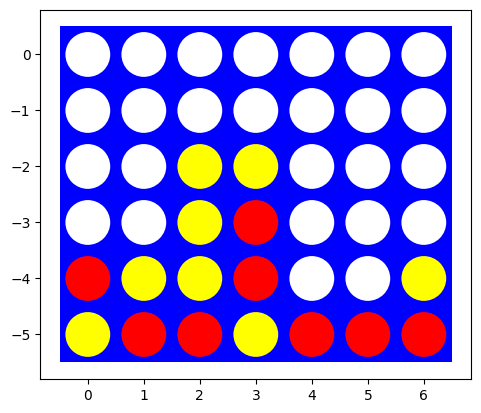

{'algo_info': {'pmcs_agent': {'time': [0.009700015652924776,
    13.880199985578656,
    17.40309997694567,
    24.891400011256337,
    18.691600009333342]},
  'random_agent2': {'time': [0.04349998198449612,
    0.042599975131452084,
    0.040499959141016006,
    0.04600000102072954]}},
 'winner': -1,
 'turns_taken': 9}

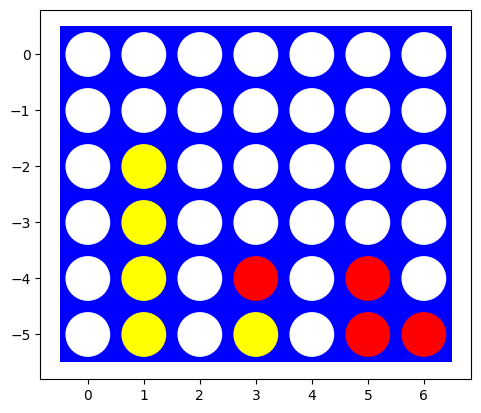

{'algo_info': {'random_agent2': {'time': [0.03750005271285772,
    0.04249997437000275,
    0.041300023440271616,
    0.16410002717748284,
    0.04480005009099841,
    0.16240001423284411,
    0.06210000719875097,
    0.03980001201853156]},
  'pmcs_agent': {'time': [5.124200019054115,
    19.194900000002235,
    28.365699981804937,
    35.70229996694252,
    56.04940000921488,
    53.645299980416894,
    49.86950004240498,
    34.424200013745576]}},
 'winner': -1,
 'turns_taken': 16}

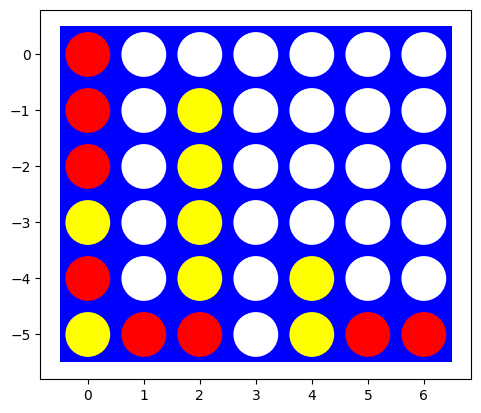

{'algo_info': {'pmcs_agent': {'time': [0.009000010322779417,
    9.635399968829006,
    27.327499992679805,
    30.104000004939735,
    34.23819999443367,
    41.54420003760606,
    42.7293999819085,
    35.205099964514375]},
  'random_agent2': {'time': [0.188400037586689,
    0.05740002961829305,
    0.040599959902465343,
    0.04190002800896764,
    0.037999998312443495,
    0.04910002462565899,
    0.04249997437000275]}},
 'winner': -1,
 'turns_taken': 15}

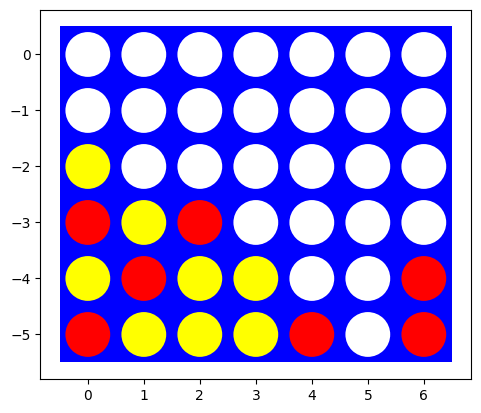

{'algo_info': {'random_agent2': {'time': [0.03920000744983554,
    0.04299997817724943,
    0.046600005589425564,
    0.049600028432905674,
    0.05420000525191426,
    0.052499992307275534,
    0.048900023102760315,
    0.03819999983534217]},
  'pmcs_agent': {'time': [7.592000009026378,
    12.997600017115474,
    19.74519999930635,
    40.24010000284761,
    37.11740003200248,
    39.30349997244775,
    50.07200001273304,
    35.509100009221584]}},
 'winner': -1,
 'turns_taken': 16}

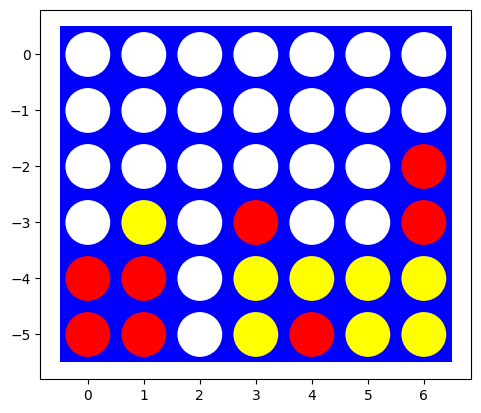

In [21]:
from IPython.display import display
for run in runs:
    display(run[0])
    visualize(run[1])

In [ ]:
res = 0
for run in runs:
    if list(run[0]["algo_info"].keys())[0] == "pmcs_agent" and run[0]['winner'] == 1:
        res += 1
    if list(run[0]["algo_info"].keys())[1] == "pmcs_agent" and run[0]['winner'] == -11:
        res += 1
res

1

In [ ]:
result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)

visualize(final_board)

KeyboardInterrupt: 

Slow replay

In [3]:
sum(sum(runs[i][0]['algo_info']['pmcs_agent']['time'])/1000 for i in range(5)) / 5

38.85945579997497

In [8]:
sum(runs[0][0]['algo_info']['heurisitic_agent1']['time'])/1000

224.75035989657044

In [29]:
board = runs[5][1]
board[2,5] = 0
board[5,1] = 0
board
pmcs_agent = FastPMCSAgent(4000)
pmcs_agent.cache = {}
pmcs_agent.act(board, -1)

1

In [3]:
import pickle
with open('runs.pkl', 'rb') as f:
    runs = pickle.load(f)

board = runs[5][2][12]
pmcs_agent.cache = {}
pmcs_agent.act(board, -1)

2

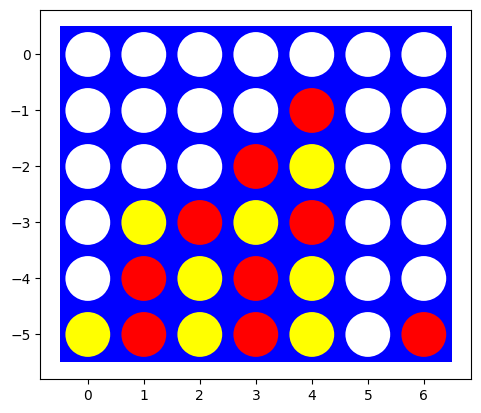

In [4]:
replay(runs[0][2], 0.2)

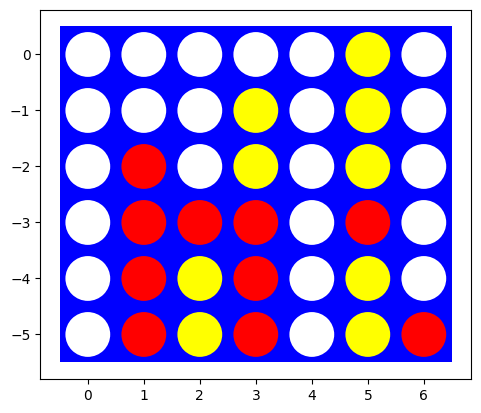

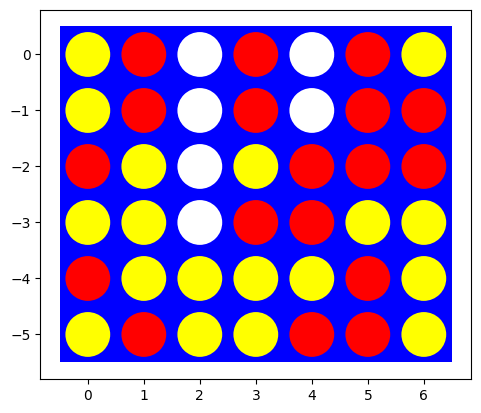

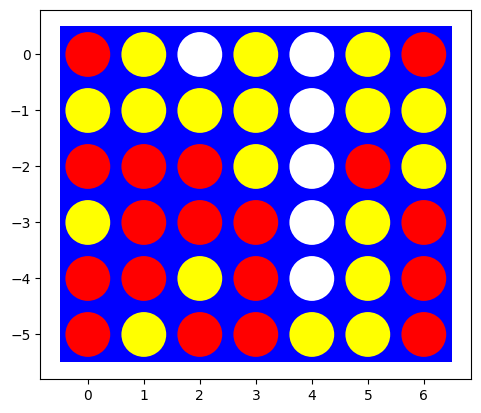

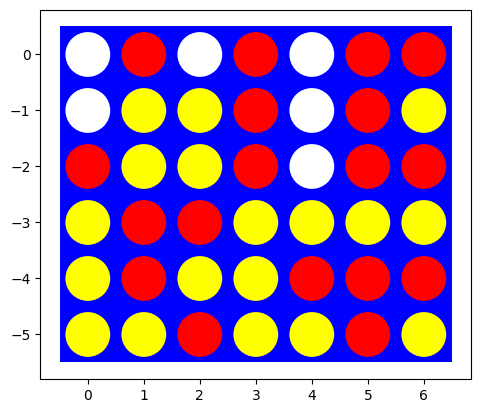

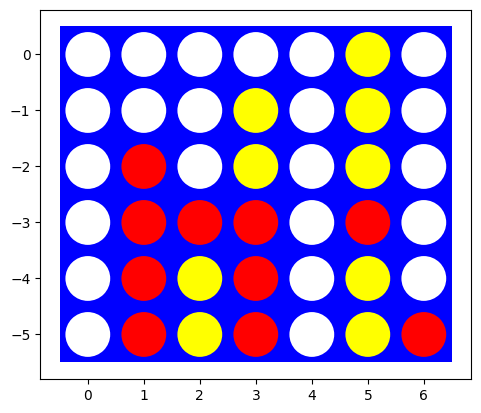

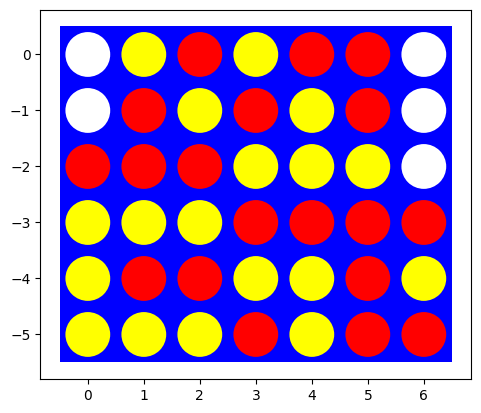

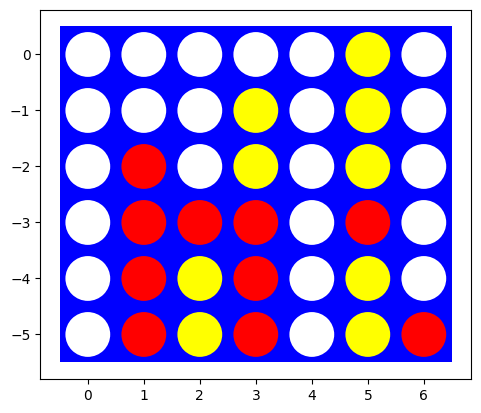

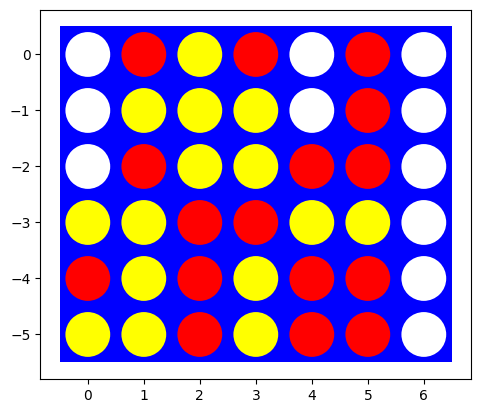

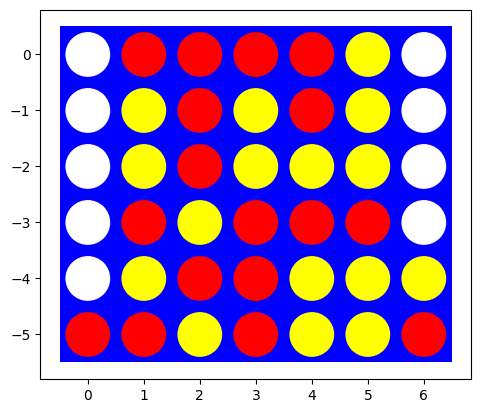

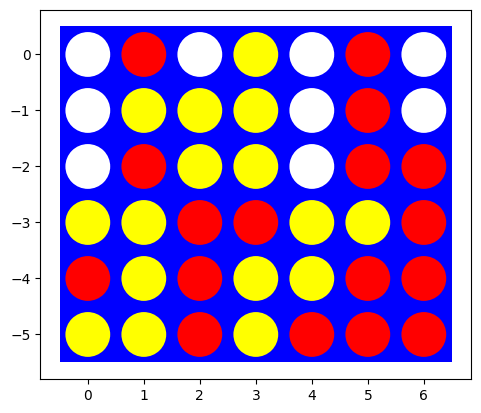

In [34]:
for i in range(10):
    visualize(runs[i][1])

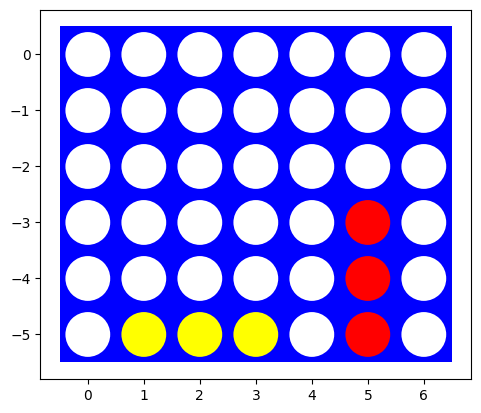

In [12]:
replay(runs[5][2])